# Term Frequency - Inverse Document Frequency (TF_IDF) : Mengukur kata penting yang paling sering muncul

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
import re
import pandas as pd
import numpy as np
import ast

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

idn_stopwords = stopwords.words('indonesian')
idn_stopwords.extend(["20detik","digoyang","video","nan","yg","salah","ya","dgn","ga","nya","gak","krn","gw","utk","gk","kalo","klo","dr","tp","jgn"])
idn_stopwords.extend(['nan','aja','banget','bgt','biar','bikin','d','dah','dapet','deh','dg','emang','gara','gitu','gue','jd','jg','kali','kayak','kek','lg','lho','lo','lu','ma','mending','nih','ngga','nggak','org','pakai','sampe','sdh','sih','sm','tau','tdk','trus','tuh','udh','yaa','yah'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_csv = "/content/drive/Shareddrives/Kementerian Analisis Data Digital/DigiScope/5 IKN/code/TF-IDF/IsiBeritaIkn.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path_csv)
df.head()

,Isi Berita
0,Perusahaan raksasa asal Taiwan Hon Hai Precisi...
1,Pertemuan itu membahas tindak lanjut Nota Kese...
2,Menurut catatan Badan Koordinasi Penanaman Mod...
3,Chairman Foxconn Young Liu menyampaikan apresi...
4,"""Adanya model bisnis baru BOL ini akan memungk..."


## Tahap Preprocessing

In [ ]:
tweet_tokenizer = TweetTokenizer()

def tokenize_tweet(text):
  return " ".join(tweet_tokenizer.tokenize(str(text)))

def remove_unnecessary_char(text):
  text = re.sub("\[USERNAME\]", " ", str(text))
  text = re.sub("\[URL\]", " ", str(text))
  text = re.sub("\[SENSITIVE-NO\]", " ", str(text))
  text = re.sub('  +', ' ', str(text))
  return text

def preprocess_tweet(text):
  text = re.sub('\n',' ',str(text)) # Remove every '\n'
  # text = re.sub('rt',' ',text) # Remove every retweet symbol
  text = re.sub('^(\@\w+ ?)+',' ',str(text))
  text = re.sub(r'\@\w+',' ',str(text)) # Remove every username
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
  text = re.sub('/', ' ', str(text))
  # text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('  +', ' ', str(text)) # Remove extra spaces
  return text
    
def remove_nonaplhanumeric(text):
  text = re.sub('[^0-9a-zA-Z]+', ' ', str(text)) 
  return text

def remove_stopword(text):
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
  text = re.sub('  +', ' ', str(text))
  text = text.strip()
  return text

In [ ]:
def preprocess(text):
  text = preprocess_tweet(text)
  text = remove_unnecessary_char(text)
  text = text.lower()
  text = tokenize_tweet(text)
  text = remove_nonaplhanumeric(text)
  text = remove_stopword(text)
  return text

Membandingkan tweet sebelum dan sesudah preprocessing

In [ ]:
# df_clean = df.copy()
# pd.options.display.max_colwidth = 280
# df_clean["clean_text"] = df_clean["Isi berita"].apply(preprocess)
# df_clean[["Isi berita", "clean_text"]].head(10)
df["temp_berita_text"] = df["Isi Berita"].apply(preprocess)
df["clean_berita"] = df["temp_berita_text"].apply(remove_stopword)
df[["Isi Berita","clean_berita"]].tail(10)

,Isi Berita,clean_berita
16628,\n\t\t\t\t\tAyo share cerita pengalaman dan up...,ayo share cerita pengalaman upload photo album...
16629,Meneruskan usaha yang dirintis oleh orang tua ...,meneruskan usaha dirintis orang tua mudah mulu...
16630,Presiden Joko Widodo hari ini dijadwalkan bera...,presiden joko widodo dijadwalkan berangkat kot...
16631,Sultan Ternate Mudaffar Sjah (79) tiba-tiba me...,sultan ternate mudaffar sjah 79 mencuat lapora...
16632,Kombinasi angka seperti 165.63.153.200 ini mer...,kombinasi angka 165 63 153 200 kunci marak pen...
16633,"Dilihat dari namanya, pasti kamu sudah tahu ap...",namanya whatsapp transparan whatsapp transpara...
16634,"Dulu, untuk mengedit foto, Anda membutuhkan ko...",mengedit foto membutuhkan komputer software pe...
16635,Royal WhatsApp menjadi salah satu jenis WA mod...,royal whatsapp jenis wa mod menawarkan fitur b...
16636,Jika Anda tidak ingin menggunakan WA mod denga...,wa mod tampilan mencolok whatsapp indigo pilih...
16637,Aplikasi WhatsApp untuk platform OS Android da...,aplikasi whatsapp platform os android ios tamp...


In [ ]:
df.to_csv("Berita_IKN_preprocessed.csv", index=False)

## Tahaf TF-IDF

In [ ]:
df = pd.read_csv("Berita_IKN_preprocessed.csv", index_col=0)

In [ ]:
df

,temp_berita_text,clean_berita
Isi Berita,,
"Perusahaan raksasa asal Taiwan Hon Hai Precision Industry Co. Ltd (Foxconn) berencana berinvestasi di Indonesia. Chairman Foxconn, Young Liu dan Presiden Joko Widodo pun sudah bertemu pada Sabtu (25/6) di Istana Bogor",perusahaan raksasa taiwan hon hai precision in...,perusahaan raksasa taiwan hon hai precision in...
"Pertemuan itu membahas tindak lanjut Nota Kesepahaman yang telah disepakati sebelumnya terkait dengan rencana investasi Foxconn, Gogoro, PT Industri Baterai Indonesia (IBC), dan PT Indika Energy Tbk di Indonesia 21 Januari 2022.",pertemuan membahas tindak nota kesepahaman dis...,pertemuan membahas tindak nota kesepahaman dis...
"Menurut catatan Badan Koordinasi Penanaman Modal (BKPM) Rencana investasi tersebut sebesar US$ 8 miliar atau Rp 118, 4 triliun (kurs Rp 14.800), dengan perkiraan penyerapan tenaga kerja lebih dari 10.000 orang.",catatan badan koordinasi penanaman modal bkpm ...,catatan badan koordinasi penanaman modal bkpm ...
"Chairman Foxconn Young Liu menyampaikan apresiasi atas dukungan Presiden Joko Widodo dan Menteri Investasi/Kepala BKPM Bahli Lahadalia yang akan sepenuhnya memfasilitasi investasi Foxconn. Foxconn menawarkan model bisnis baru yaitu BOL (Build, Operate, Localize) untuk investasinya di Indonesia.",chairman foxconn young liu apresiasi dukungan ...,chairman foxconn young liu apresiasi dukungan ...
"""Adanya model bisnis baru BOL ini akan memungkinkan Foxconn dan perusahaan Taiwan lainnya untuk dapat bermitra lebih baik lagi dengan perusahaan Indonesia dalam membangun industri di sini,"" ujar Young melalui pernyataan tertulisnya, dikutip Senin (27/6/2022).",model bisnis bol foxconn perusahaan taiwan ber...,model bisnis bol foxconn perusahaan taiwan ber...
...,...,...
"Dilihat dari namanya, pasti kamu sudah tahu apa itu WhatsApp transparan. Ya, WhatsApp transparan adalah varian terbaru dari WA Mod yang memiliki tampilan yang transparan. Keunikannya ini membuat WA transparan […]",namanya whatsapp transparan whatsapp transpara...,namanya whatsapp transparan whatsapp transpara...
"Dulu, untuk mengedit foto, Anda membutuhkan komputer dan software pengedit foto. Namun, saat ini mengedit foto menjadi lebih mudah dan bisa dilakukan oleh siapa saja. Anda bahkan tidak memerlukan komputer […]",mengedit foto membutuhkan komputer software pe...,mengedit foto membutuhkan komputer software pe...
Royal WhatsApp menjadi salah satu jenis WA mod yang menawarkan fitur yang berbeda. Tampilannya yang transparan akan membuat Anda takjub. Tak heran jika penggunaan aplikasi ini semakin populer di kalangan […],royal whatsapp jenis wa mod menawarkan fitur b...,royal whatsapp jenis wa mod menawarkan fitur b...


In [ ]:
df = df[df("clean_berita","Isi Berita").str.contains(",,") == False]
df

TypeError: ignored

In [ ]:
tf_idf = TfidfVectorizer()
tfidf_mat = tf_idf.fit_transform(df["clean_berita"].values.astype('U')).toarray()


terms = tf_idf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Hasil TF-IDF

In [ ]:

ranking = pd.DataFrame(data, columns=['Kata','Rank'])
ranking.sort_values('Rank', ascending=False, inplace=True, ignore_index=True)
ranking

,Kata,Rank
0,nan,1665.000000
1,ikn,459.434823
2,gambas,417.902797
3,kota,414.303297
4,nusantara,353.747701
...,...,...
21884,grabbing,0.031720
21885,diarsiteki,0.031720
21886,pendamping,0.031720
21887,melegalisasi,0.031720


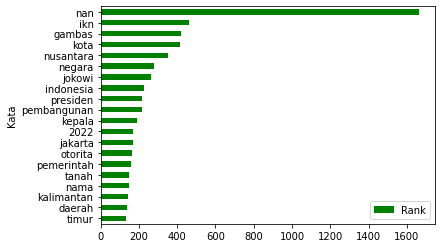

In [ ]:
ranking.sort_values('Rank', ascending=True, ignore_index=True).tail(20).plot.barh(x="Kata",color="green")

In [ ]:
ranking.to_csv("ranking.csv", index=False)

In [ ]:
df_tokoh = ranking[ranking["Kata"].isin(["jokowi" , "luhut" , "zayed" , "tony" , "lee" , "hadimulyono" , "puan" , "prabowo" , "megawati" , "hamdam" , "stark" , "qornain", "mbak Intan", "tito"])]


df_tokoh

,Kata,Rank
6,jokowi,264.155623
138,puan,40.624619
179,luhut,34.405692
474,megawati,18.411595
970,prabowo,10.368272
1252,tito,8.387475
1531,tony,6.876125
3896,lee,2.456536
4154,zayed,2.274366
5811,hamdam,1.469352


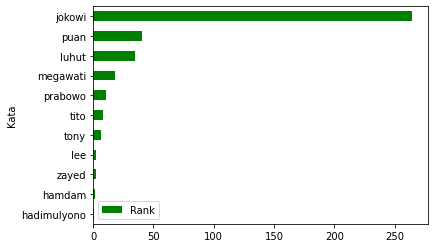

In [ ]:
df_tokoh.sort_values('Rank', ascending=True, ignore_index=True).plot.barh(x="Kata",color="green")